In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [7]:
df = pd.read_csv('Data/df.csv')
df_outliers_median = pd.read_csv('Data/df_outliers_median.csv')
df_sans_outliers = pd.read_csv('Data/df_sans_outliers.csv')

In [8]:
df = df.drop('Unnamed: 0', axis=1)
df_outliers_median = df_outliers_median.drop('Unnamed: 0', axis=1)
df_sans_outliers = df_sans_outliers.drop('Unnamed: 0', axis=1)

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


In [9]:
df_outliers_median.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


In [10]:
df_sans_outliers.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


# OLS esquisse

In [4]:
df_inf = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=False)

In [5]:
X=df_inf.drop(['median_house_value'], axis=1)
y = df_inf['median_house_value']

In [6]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
ols = sm.OLS(y, sm.add_constant(X)).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     2322.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:34:01   Log-Likelihood:            -2.0502e+05
No. Observations:               16336   AIC:                         4.101e+05
Df Residuals:                   16322   BIC:                         4.102e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [7]:
model = sm.OLS(y, X).fit()

In [8]:
ols = sm.OLS(y, sm.add_constant(X)).fit()

In [9]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     2322.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:34:01   Log-Likelihood:            -2.0502e+05
No. Observations:               16336   AIC:                         4.101e+05
Df Residuals:                   16322   BIC:                         4.102e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [10]:
ols.params

const                        -1.689503e+06
Indice_house                  8.000425e-01
longitude                    -2.441834e+04
latitude                     -2.378806e+04
median_age                    1.120056e+03
total_rooms                  -6.577900e+00
total_bedrooms                9.748543e+01
population                   -3.732069e+01
households                    5.434858e+01
median_income                 3.923927e+04
ocean_proximity_<1H OCEAN    -3.637490e+05
ocean_proximity_INLAND       -4.054834e+05
ocean_proximity_ISLAND       -1.933863e+05
ocean_proximity_NEAR BAY     -3.634014e+05
ocean_proximity_NEAR OCEAN   -3.634825e+05
dtype: float64

In [11]:
ols.rsquared

0.6490688592049814

# anova par rapport a l'ocean_proximity

 ===========

# standardisation df

In [12]:
list(df.columns)

['Indice_house',
 'longitude',
 'latitude',
 'median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [13]:
df_stand = df.drop(['Indice_house','longitude', 'latitude','ocean_proximity'], axis=1)
df_stand

,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0
1,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0
2,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0
3,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0
4,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0
...,...,...,...,...,...,...,...
16331,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0
16332,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0
16333,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0
16334,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0


In [14]:
from sklearn.preprocessing import StandardScaler


In [15]:
scaler = StandardScaler()

In [16]:
df_standardised = scaler.fit_transform(df_stand)

In [17]:
df_standardised = pd.DataFrame(df_standardised)


In [18]:
df_standardised

,0,1,2,3,4,5,6
0,-1.794454,-0.356850,-0.155975,-0.032086,-0.217734,-1.258728,-1.166420
1,-1.635811,-0.276133,-0.447606,-0.493819,-0.417498,1.611634,0.586995
2,-0.287346,-0.797862,-0.765107,-0.434269,-0.744384,-1.220732,-1.285281
3,0.188583,-0.911947,-0.729829,-0.722528,-0.710658,-1.234049,-0.055895
4,-0.604632,-0.325736,-0.391161,-0.262521,-0.334479,0.115152,-0.768193
...,...,...,...,...,...,...,...
16331,-0.683953,-0.531812,-0.614588,-0.594797,-0.650988,-0.423345,-0.977284
16332,1.616369,-0.125973,-0.083067,-0.261658,-0.111366,-0.660727,-0.896597
16333,-0.763275,-0.051118,-0.184197,-0.196929,-0.186602,0.334091,-0.120097
16334,0.823154,0.059360,0.707159,0.959563,0.705850,-0.680967,-0.459328


In [19]:
df_standardised = df_standardised.rename(columns={0:'median_age', 1:'total_rooms', 2:'total_bedrooms', 3:'population', 4:'households',
 5:'median_income', 6:'median_house_value'})

In [20]:
df_standardised

,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.794454,-0.356850,-0.155975,-0.032086,-0.217734,-1.258728,-1.166420
1,-1.635811,-0.276133,-0.447606,-0.493819,-0.417498,1.611634,0.586995
2,-0.287346,-0.797862,-0.765107,-0.434269,-0.744384,-1.220732,-1.285281
3,0.188583,-0.911947,-0.729829,-0.722528,-0.710658,-1.234049,-0.055895
4,-0.604632,-0.325736,-0.391161,-0.262521,-0.334479,0.115152,-0.768193
...,...,...,...,...,...,...,...
16331,-0.683953,-0.531812,-0.614588,-0.594797,-0.650988,-0.423345,-0.977284
16332,1.616369,-0.125973,-0.083067,-0.261658,-0.111366,-0.660727,-0.896597
16333,-0.763275,-0.051118,-0.184197,-0.196929,-0.186602,0.334091,-0.120097
16334,0.823154,0.059360,0.707159,0.959563,0.705850,-0.680967,-0.459328


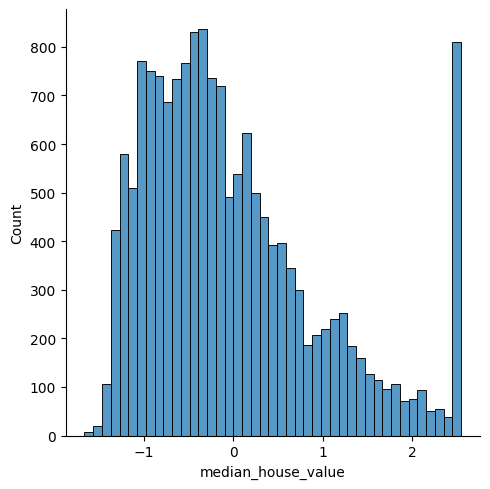

In [21]:
sns.displot(df_standardised, x="median_house_value")

In [22]:
df_stand_corr = df_standardised.corr

In [23]:
XX=df_standardised.drop(['median_house_value'], axis=1)
yy = df_standardised['median_house_value']

In [24]:
XX = sm.add_constant(XX)

In [25]:
model = sm.OLS(yy, XX).fit()

In [26]:
ols = sm.OLS(yy, sm.add_constant(XX)).fit()

In [27]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     3582.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:34:02   Log-Likelihood:                -16320.
No. Observations:               16336   AIC:                         3.265e+04
Df Residuals:                   16329   BIC:                         3.271e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.084e-16      0.005   2.11e

# normalisation sur df

In [9]:
ohe = OneHotEncoder()
ohe.fit_transform(df[['ocean_proximity']]).toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [10]:
feature_array = ohe.fit_transform(df[['ocean_proximity']]).toarray()
ohe.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [11]:
feature_labels = ohe.categories_

In [12]:
np.array(feature_labels).ravel()

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [13]:
feature_labels = np.array(feature_labels).ravel()

In [17]:
df_enco = pd.DataFrame(feature_array, columns = feature_labels)
df_enco

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
16331,0.0,1.0,0.0,0.0,0.0
16332,0.0,0.0,0.0,1.0,0.0
16333,0.0,1.0,0.0,0.0,0.0
16334,1.0,0.0,0.0,0.0,0.0


In [38]:
df_2 = pd.concat([df_no_ocean,df_enco],axis=1)
df_2 = df_2.drop('Unnamed: 0', axis=1)
df_2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0.0,1.0,0.0,0.0,0.0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1.0,0.0,0.0,0.0,0.0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0.0,1.0,0.0,0.0,0.0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1.0,0.0,0.0,0.0,0.0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16331,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0.0,1.0,0.0,0.0,0.0
16332,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0.0,0.0,0.0,1.0,0.0
16333,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0.0,1.0,0.0,0.0,0.0
16334,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1.0,0.0,0.0,0.0,0.0


# normalisation df_outliers_median

In [18]:
ohe = OneHotEncoder()
ohe.fit_transform(df[['ocean_proximity']]).toarray()

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [19]:
feature_array = ohe.fit_transform(df_outliers_median[['ocean_proximity']]).toarray()
ohe.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [20]:
feature_labels = ohe.categories_

In [21]:
np.array(feature_labels).ravel()

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [22]:
feature_labels = np.array(feature_labels).ravel()

In [25]:
df_outliers_median_enco = pd.DataFrame(feature_array, columns = feature_labels)
df_outliers_median_enco

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
16331,0.0,1.0,0.0,0.0,0.0
16332,0.0,0.0,0.0,1.0,0.0
16333,0.0,1.0,0.0,0.0,0.0
16334,1.0,0.0,0.0,0.0,0.0


In [36]:
df_outliers_median_2 = pd.concat([df_no_ocean,df_enco],axis=1)
df_outliers_median_2.drop('Unnamed: 0', axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0.0,1.0,0.0,0.0,0.0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1.0,0.0,0.0,0.0,0.0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0.0,1.0,0.0,0.0,0.0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1.0,0.0,0.0,0.0,0.0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16331,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0.0,1.0,0.0,0.0,0.0
16332,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0.0,0.0,0.0,1.0,0.0
16333,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0.0,1.0,0.0,0.0,0.0
16334,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1.0,0.0,0.0,0.0,0.0


# normalisation df_sans_outliers

In [ ]:
ohe = OneHotEncoder()
ohe.fit_transform(df_sans_outliers[['ocean_proximity']]).toarray()

In [ ]:
feature_array = ohe.fit_transform(df_sans_outliers[['ocean_proximity']]).toarray()
ohe.categories_

In [ ]:
feature_labels = ohe.categories_

In [ ]:
np.array(feature_labels).ravel()

In [ ]:
feature_labels = np.array(feature_labels).ravel()

In [26]:
df_sans_outliers_enco = pd.DataFrame(feature_array, columns = feature_labels)
df_sans_outliers_enco

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
16331,0.0,1.0,0.0,0.0,0.0
16332,0.0,0.0,0.0,1.0,0.0
16333,0.0,1.0,0.0,0.0,0.0
16334,1.0,0.0,0.0,0.0,0.0


In [28]:
df_no_ocean = df.drop(['ocean_proximity'],axis=1)

In [37]:
df_sans_outliers_2 = pd.concat([df_no_ocean,df_enco],axis=1)
df_sans_outliers_2.drop('Unnamed: 0', axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0.0,1.0,0.0,0.0,0.0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1.0,0.0,0.0,0.0,0.0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0.0,1.0,0.0,0.0,0.0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1.0,0.0,0.0,0.0,0.0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16331,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0.0,1.0,0.0,0.0,0.0
16332,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0.0,0.0,0.0,1.0,0.0
16333,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0.0,1.0,0.0,0.0,0.0
16334,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1.0,0.0,0.0,0.0,0.0
